In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import git
import sys
import os

sys.path.append(git.Repo(".", search_parent_directories=True).working_tree_dir)
sys.path.append(os.abs.path(os.path.join(os.path.dirname(__file__), "..")))

from modules.utils import SYMPTOM_NAMES, ALTERNATIVE_SYMPTOM_NAMES

In [2]:
df = pd.read_csv("../datasets/raw/EPI_project_csbv_ver2.csv")
df

,date,count,total_count,ratio,Symp
0,1/1/21,6,2292,0.002618,cough
1,1/2/21,8,1656,0.004831,NaN
2,1/3/21,5,1761,0.002839,NaN
3,1/4/21,9,4096,0.002197,NaN
4,1/5/21,6,4547,0.001320,NaN
...,...,...,...,...,...
5835,12/27/21,0,76,0.000000,NaN
5836,12/28/21,0,64,0.000000,NaN
5837,12/29/21,0,78,0.000000,NaN
5838,12/30/21,0,140,0.000000,NaN


In [3]:
df.columns = ["date", "count", "total_count", "count_ratio", "symptom"]
# Fill NaN symptom with previous values (rolling)
df = df.fillna(method="ffill")
# Make symptom name lowercased and prefixed with "symptom_"
df["symptom"] = df["symptom"].apply(lambda x: "symptom:" + x.lower())
# Reformat date to YYYY-MM-DD
df["date"] = pd.to_datetime(df["date"])
df

,date,count,total_count,count_ratio,symptom
0,2021-01-01,6,2292,0.002618,symptom:cough
1,2021-01-02,8,1656,0.004831,symptom:cough
2,2021-01-03,5,1761,0.002839,symptom:cough
3,2021-01-04,9,4096,0.002197,symptom:cough
4,2021-01-05,6,4547,0.001320,symptom:cough
...,...,...,...,...,...
5835,2021-12-27,0,76,0.000000,symptom:anosmia
5836,2021-12-28,0,64,0.000000,symptom:anosmia
5837,2021-12-29,0,78,0.000000,symptom:anosmia
5838,2021-12-30,0,140,0.000000,symptom:anosmia


In [4]:
df_count_ratio = (
    pd.pivot_table(df, index="date", columns="symptom", values="count_ratio")
    .reset_index()
    .rename_axis(None, axis=1)
)
df_count_ratio.head()

,date,symptom:ageusia,symptom:anosmia,symptom:chills,symptom:cough,symptom:diarrhea,symptom:fatigue,symptom:fever,symptom:headache,symptom:loss of smell,symptom:loss of taste,symptom:muscle weakness,symptom:nasal congestion,symptom:nausea,symptom:shortness of breath,symptom:sore throat,symptom:vomiting
0,2021-01-01,0.0,0.000000,0.001309,0.002618,0.001745,0.006981,0.010471,0.002182,0.000000,0.000873,0.0,0.0,0.000000,0.002182,0.000436,0.002618
1,2021-01-02,0.0,0.000604,0.000000,0.004831,0.000604,0.019928,0.003019,0.000000,0.001208,0.000604,0.0,0.0,0.000000,0.000604,0.000000,0.001208
2,2021-01-03,0.0,0.000000,0.002271,0.002839,0.000000,0.005679,0.007382,0.002839,0.000568,0.001136,0.0,0.0,0.000000,0.001136,0.000000,0.000000
3,2021-01-04,0.0,0.000000,0.002441,0.002197,0.000244,0.004150,0.005371,0.002441,0.000000,0.000488,0.0,0.0,0.001465,0.001465,0.000488,0.000244
4,2021-01-05,0.0,0.000000,0.001320,0.001320,0.000660,0.007038,0.004838,0.001539,0.001539,0.000660,0.0,0.0,0.001539,0.001320,0.001320,0.000880


In [5]:
df_count = (
    pd.pivot_table(df, index="date", columns="symptom", values="count")
    .reset_index()
    .rename_axis(None, axis=1)
)
df_count.head()

,date,symptom:ageusia,symptom:anosmia,symptom:chills,symptom:cough,symptom:diarrhea,symptom:fatigue,symptom:fever,symptom:headache,symptom:loss of smell,symptom:loss of taste,symptom:muscle weakness,symptom:nasal congestion,symptom:nausea,symptom:shortness of breath,symptom:sore throat,symptom:vomiting
0,2021-01-01,0,0,3,6,4,16,24,5,0,2,0,0,0,5,1,6
1,2021-01-02,0,1,0,8,1,33,5,0,2,1,0,0,0,1,0,2
2,2021-01-03,0,0,4,5,0,10,13,5,1,2,0,0,0,2,0,0
3,2021-01-04,0,0,10,9,1,17,22,10,0,2,0,0,6,6,2,1
4,2021-01-05,0,0,6,6,3,32,22,7,7,3,0,0,7,6,6,4


In [6]:
df_total_count = (
    pd.pivot_table(df, index="date", columns="symptom", values="total_count")
    .reset_index()
    .rename_axis(None, axis=1)
)
df_total_count.head()

,date,symptom:ageusia,symptom:anosmia,symptom:chills,symptom:cough,symptom:diarrhea,symptom:fatigue,symptom:fever,symptom:headache,symptom:loss of smell,symptom:loss of taste,symptom:muscle weakness,symptom:nasal congestion,symptom:nausea,symptom:shortness of breath,symptom:sore throat,symptom:vomiting
0,2021-01-01,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292
1,2021-01-02,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656
2,2021-01-03,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761
3,2021-01-04,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096,4096
4,2021-01-05,4547,4547,4547,4547,4547,4547,4547,4547,4547,4547,4547,4547,4547,4547,4547,4547


In [7]:
for column_name in df_count.columns:
    column = df_count[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    print("# of 0's in col '{}': {}".format(column_name, count))

# of 0's in col 'date': 0
# of 0's in col 'symptom:ageusia': 357
# of 0's in col 'symptom:anosmia': 310
# of 0's in col 'symptom:chills': 27
# of 0's in col 'symptom:cough': 17
# of 0's in col 'symptom:diarrhea': 59
# of 0's in col 'symptom:fatigue': 4
# of 0's in col 'symptom:fever': 6
# of 0's in col 'symptom:headache': 12
# of 0's in col 'symptom:loss of smell': 219
# of 0's in col 'symptom:loss of taste': 130
# of 0's in col 'symptom:muscle weakness': 276
# of 0's in col 'symptom:nasal congestion': 325
# of 0's in col 'symptom:nausea': 38
# of 0's in col 'symptom:shortness of breath': 52
# of 0's in col 'symptom:sore throat': 95
# of 0's in col 'symptom:vomiting': 43


In [8]:
cm = plt.get_cmap("tab20")
NUM_COLORS = 20
ROLLING_WINDOW = 11
symptoms_list = sorted([symptom.lower() for symptom in SYMPTOM_NAMES])
symptoms_list += [s.lower() for s in ALTERNATIVE_SYMPTOM_NAMES.values()]
symptoms_list = sorted(symptoms_list)
symptoms_list

['ageusia',
 'anosmia',
 'chills',
 'cough',
 'diarrhea',
 'fatigue',
 'fever',
 'headache',
 'loss of smell',
 'loss of taste',
 'muscle weakness',
 'nasal congestion',
 'nausea',
 'shortness of breath',
 'sore throat',
 'vomiting']

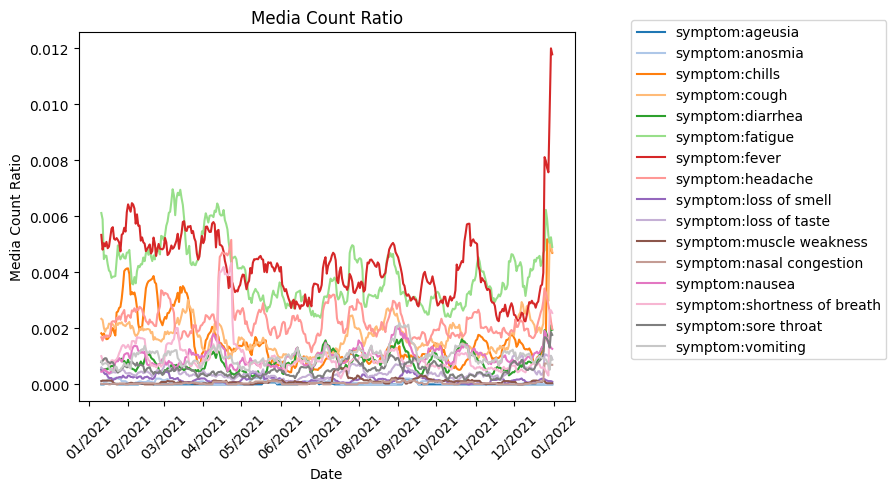

In [9]:
fig, ax = plt.subplots()
for i, symptom in enumerate(symptoms_list):
    header = "symptom:" + symptom
    ax.plot(
        df_count_ratio["date"],
        df_count_ratio[header].rolling(window=ROLLING_WINDOW).mean(),
        color=cm(i * 1.0 / NUM_COLORS),
        label=header,
    )

ax.set_xlabel("Date")
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%m/%Y"))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_ylabel("Media Count Ratio")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Media Count Ratio")
plt.show()

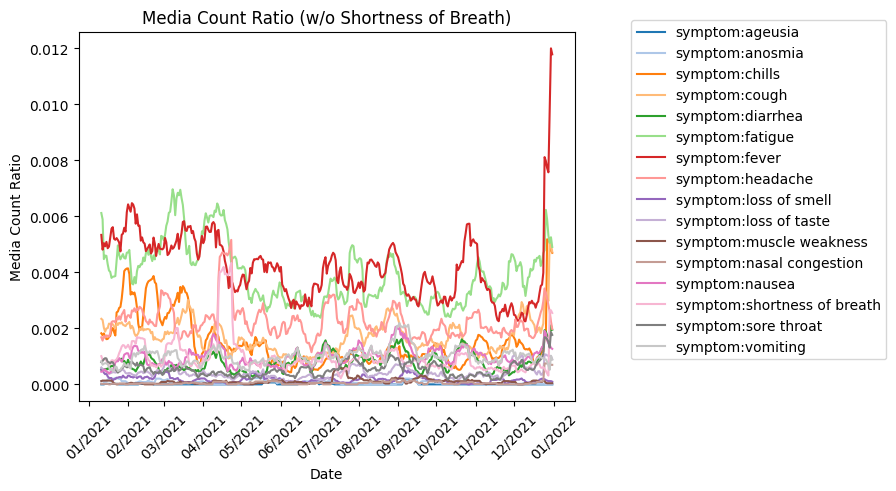

In [10]:
fig, ax = plt.subplots()
for i, symptom in enumerate(symptoms_list):
    header = "symptom:" + symptom
    ax.plot(
        df_count_ratio["date"],
        df_count_ratio[header].rolling(window=ROLLING_WINDOW).mean(),
        color=cm(i * 1.0 / NUM_COLORS),
        label=header,
    )

ax.set_xlabel("Date")
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%m/%Y"))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_ylabel("Media Count Ratio")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Media Count Ratio (w/o Shortness of Breath)")
plt.show()

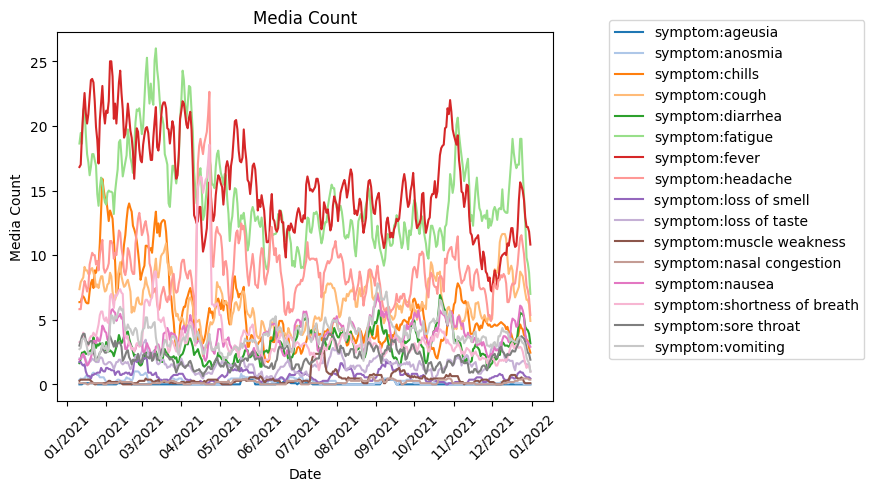

In [11]:
fig, ax = plt.subplots()
for i, symptom in enumerate(symptoms_list):
    header = "symptom:" + symptom
    ax.plot(
        df_count["date"],
        df_count[header].rolling(window=ROLLING_WINDOW).mean(),
        color=cm(i * 1.0 / NUM_COLORS),
        label=header,
    )

ax.set_xlabel("Date")
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%m/%Y"))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_ylabel("Media Count")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Media Count")
plt.show()

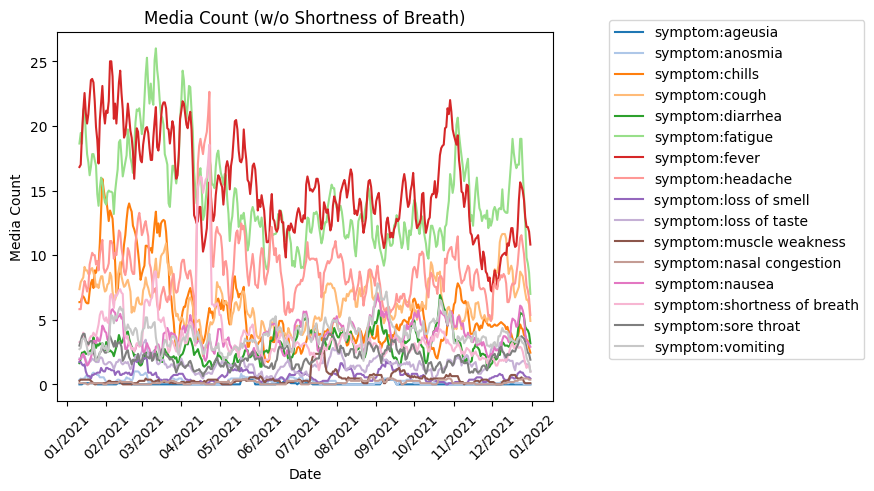

In [12]:
fig, ax = plt.subplots()
for i, symptom in enumerate(symptoms_list):
    header = "symptom:" + symptom
    ax.plot(
        df_count["date"],
        df_count[header].rolling(window=ROLLING_WINDOW).mean(),
        color=cm(i * 1.0 / NUM_COLORS),
        label=header,
    )

ax.set_xlabel("Date")
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%m/%Y"))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_ylabel("Media Count")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Media Count (w/o Shortness of Breath)")
plt.show()

In [13]:
df_count.to_csv("../datasets/media_count_all_2021.csv", index=False)
df_count_ratio.to_csv("../datasets/media_count_ratio_all_2021.csv", index=False)
df_total_count.to_csv("../datasets/media_total_count_all_2021.csv", index=False)